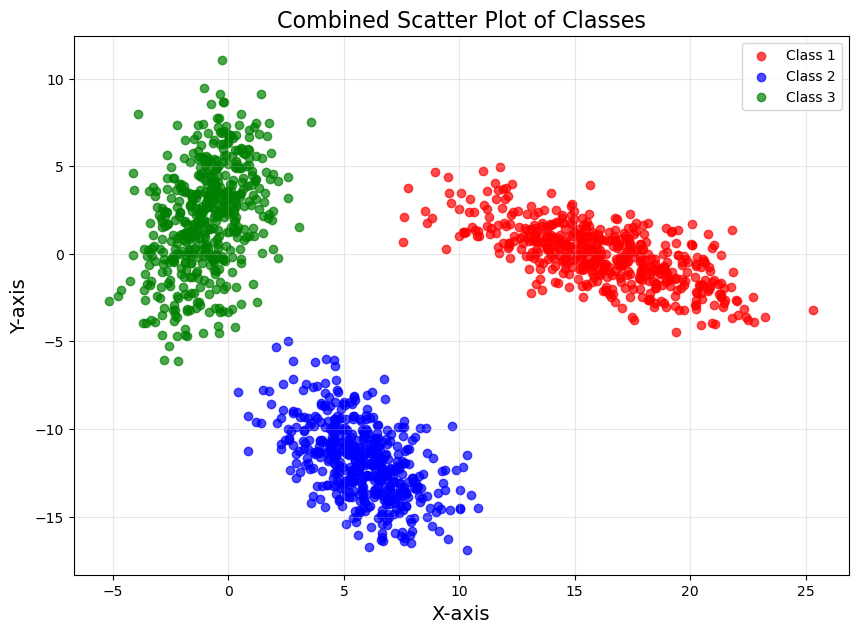


Distances between the random point and each class mean:
Class 1: 6.38
Class 2: 18.66
Class 3: 23.42

The closest class mean to the random point is: Class 1


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

# Load datasets with space delimiter from specified paths
class1 = pd.read_csv(r'C:\Users\nitip\OneDrive\Desktop\dec2024\Group04[1]\Group04\LS_Group04\Class1.txt', delimiter=' ', header=None)
class1.columns = ['X', 'Y']
class2 = pd.read_csv(r'C:\Users\nitip\OneDrive\Desktop\dec2024\Group04[1]\Group04\LS_Group04\Class2.txt', delimiter=' ', header=None)
class2.columns = ['X', 'Y']
class3 = pd.read_csv(r'C:\Users\nitip\OneDrive\Desktop\dec2024\Group04[1]\Group04\LS_Group04\Class3.txt', delimiter=' ', header=None)
class3.columns = ['X', 'Y']

# Combine the datasets
combined_dataset = pd.concat([class1, class2, class3], ignore_index=True)

# Scatter plot for classes
plt.figure(figsize=(10, 7))

plt.scatter(class1['X'], class1['Y'], color='red', label='Class 1', alpha=0.7)
plt.scatter(class2['X'], class2['Y'], color='blue', label='Class 2', alpha=0.7)
plt.scatter(class3['X'], class3['Y'], color='green', label='Class 3', alpha=0.7)

plt.title("Combined Scatter Plot of Classes", fontsize=16)
plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Features and labels
X = combined_dataset[['X', 'Y']]  # Features (X and Y)
y = np.concatenate([np.zeros(len(class1)), np.ones(len(class2)), np.full(len(class3), 2)])  # Labels: Class 1, 2, 3

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to calculate Euclidean distances between a random point and dataset
def euclidean_distances(X_train, random_point):
    distances = []  # To store calculated distances
    for _, row in X_train.iterrows():
        row_point = row.values  # Convert row to NumPy array
        distance = np.sqrt(np.sum((row_point - random_point) ** 2))  # Euclidean formula
        distances.append(distance)  # Append result to distances
    return np.array(distances)

# Calculate distances array
random_point = X.sample(n=1).values.flatten()  # Select a random point from X
# Calculate the mean of each class manually
mean_class1 = [sum(class1['X']) / len(class1), sum(class1['Y']) / len(class1)]
mean_class2 = [sum(class2['X']) / len(class2), sum(class2['Y']) / len(class2)]
mean_class3 = [sum(class3['X']) / len(class3), sum(class3['Y']) / len(class3)]

# Store the class means
class_means = {
    'Class 1': mean_class1,
    'Class 2': mean_class2,
    'Class 3': mean_class3
}

# Function to calculate Euclidean distance manually
def calculate_distance(point1, point2):
    distance = 0  # Initialize distance
    for i in range(len(point1)):
        difference = point1[i] - point2[i]
        distance += difference * difference  # Square the difference
    return distance ** 0.5  # Take the square root of the sum

# Calculate the distances between the random point and each class mean
distances = {}
for class_name, mean in class_means.items():
    distance = calculate_distance(random_point, mean)
    distances[class_name] = distance

# Print the distances
print("\nDistances between the random point and each class mean:")
for class_name, distance in distances.items():
    print(f"{class_name}: {distance:.2f}")

# Determine the closest class mean
closest_class = None
min_distance = float('inf')
for class_name, distance in distances.items():
    if distance < min_distance:
        min_distance = distance
        closest_class = class_name

print(f"\nThe closest class mean to the random point is: {closest_class}")


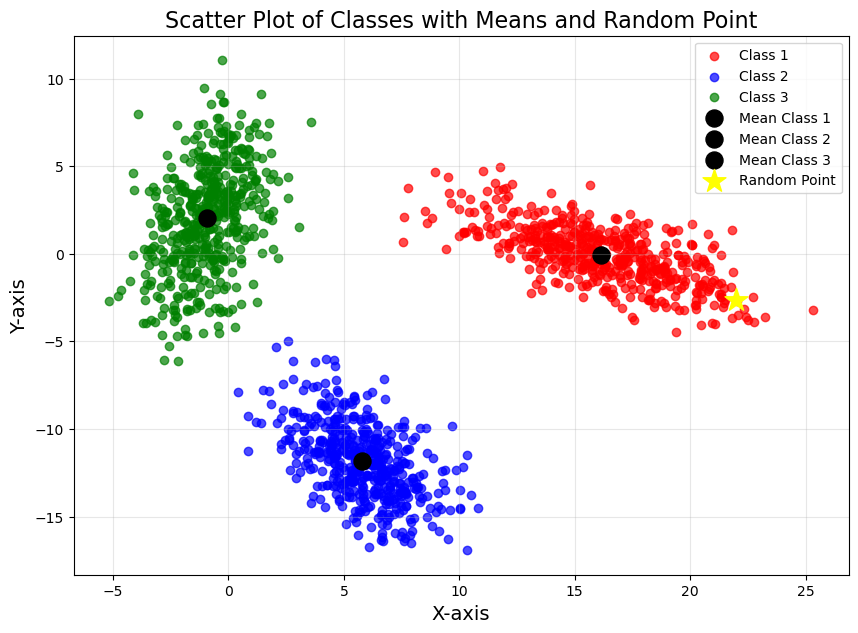

In [9]:
# Scatter plot of the classes
plt.figure(figsize=(10, 7))

# Scatter for class1
plt.scatter(class1['X'], class1['Y'], color='red', label='Class 1', alpha=0.7)

# Scatter for class2
plt.scatter(class2['X'], class2['Y'], color='blue', label='Class 2', alpha=0.7)

# Scatter for class3
plt.scatter(class3['X'], class3['Y'], color='green', label='Class 3', alpha=0.7)

# Plot the means of each class
plt.scatter(mean_class1[0], mean_class1[1], color='black', marker='o', s=150, label='Mean Class 1')
plt.scatter(mean_class2[0], mean_class2[1], color='black', marker='o', s=150, label='Mean Class 2')
plt.scatter(mean_class3[0], mean_class3[1], color='black', marker='o', s=150, label='Mean Class 3')

# Plot the random point
plt.scatter(random_point[0], random_point[1], color='yellow', marker='*', s=300, label='Random Point')

# Add labels, title, legend, and grid
plt.title("Scatter Plot of Classes with Means and Random Point", fontsize=16)
plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()


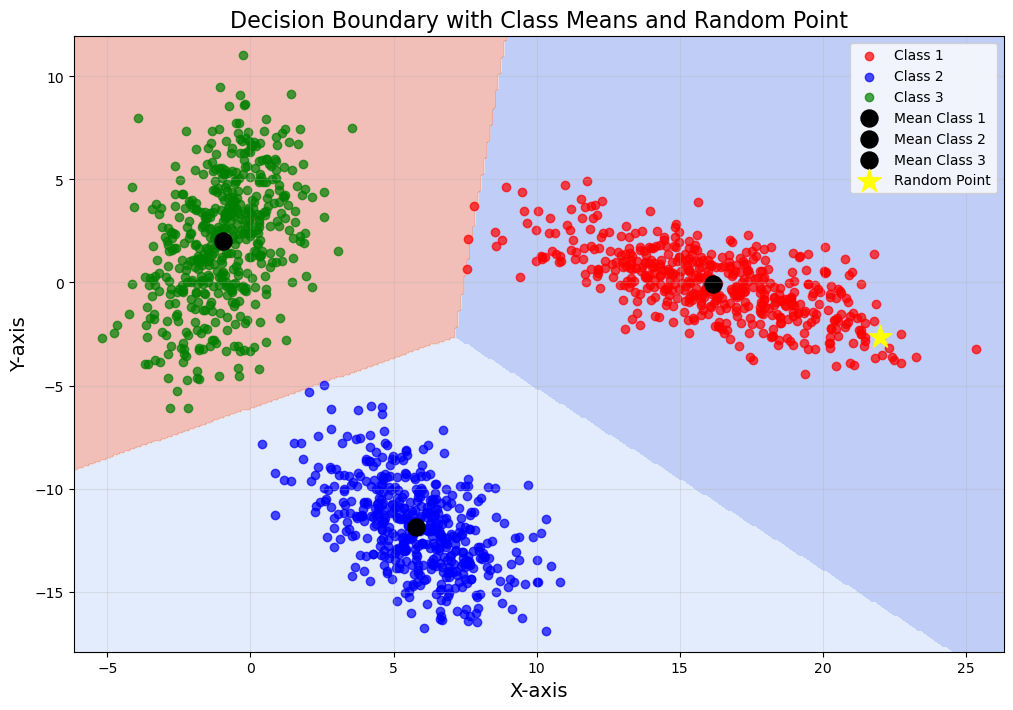

In [11]:
# Mapping of class names to numeric labels
class_label_map = {'Class 1': 0, 'Class 2': 1, 'Class 3': 2}
label_class_map = {v: k for k, v in class_label_map.items()}  # Reverse mapping for legend

# Predict class for each point in the grid (use numeric labels)
Z = np.array([
    class_label_map[classify_point([x, y], class_means)]
    for x, y in np.c_[xx.ravel(), yy.ravel()]
])

# Reshape the predictions to match the grid shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm', levels=len(class_label_map))

# Scatter plot for classes
plt.scatter(class1['X'], class1['Y'], color='red', label='Class 1', alpha=0.7)
plt.scatter(class2['X'], class2['Y'], color='blue', label='Class 2', alpha=0.7)
plt.scatter(class3['X'], class3['Y'], color='green', label='Class 3', alpha=0.7)

# Plot the class means
plt.scatter(mean_class1[0], mean_class1[1], color='black', marker='o', s=150, label='Mean Class 1')
plt.scatter(mean_class2[0], mean_class2[1], color='black', marker='o', s=150, label='Mean Class 2')
plt.scatter(mean_class3[0], mean_class3[1], color='black', marker='o', s=150, label='Mean Class 3')

# Plot the random point
plt.scatter(random_point[0], random_point[1], color='yellow', marker='*', s=300, label='Random Point')

# Add labels, title, legend, and grid
plt.title("Decision Boundary with Class Means and Random Point", fontsize=16)
plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


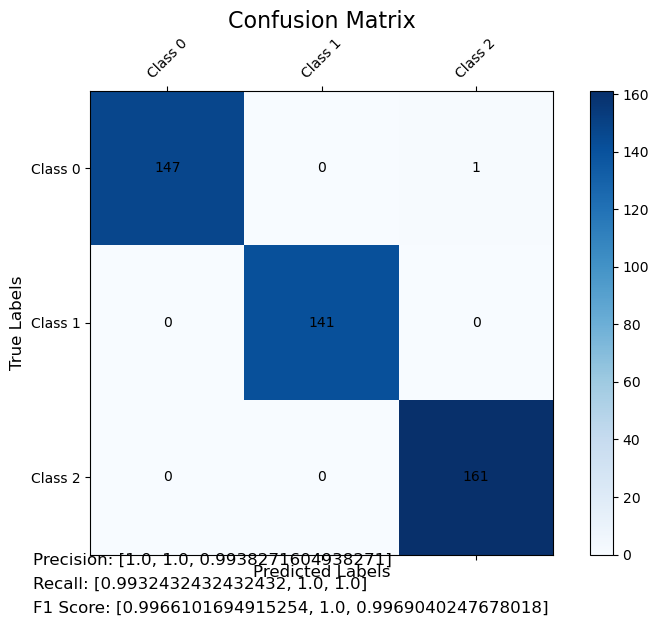

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Initialize variables
num_classes = len(class_means)
conf_matrix = [[0] * num_classes for _ in range(num_classes)]

# Predict the class labels for the test set (y_pred)
y_pred = []
for _, row in X_test.iterrows():
    # Use classify_point function to predict class for each test instance
    predicted_class = classify_point(row, class_means)
    # Append the numeric label corresponding to the predicted class
    y_pred.append(class_label_map[predicted_class])

# Step 2: Populate the confusion matrix
for true_label, pred_label in zip(y_test, y_pred):
    conf_matrix[int(true_label)][int(pred_label)] += 1

# Step 3: Calculate Precision, Recall, and F1-Score for each class
precision = []
recall = []
f1_score = []

for i in range(num_classes):
    tp = conf_matrix[i][i]  # True Positives
    fp = sum(conf_matrix[j][i] for j in range(num_classes)) - tp  # False Positives
    fn = sum(conf_matrix[i][j] for j in range(num_classes)) - tp  # False Negatives
    
    # Calculate Precision, Recall, and F1 Score
    precision_value = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall_value = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_value = (2 * precision_value * recall_value) / (precision_value + recall_value) if (precision_value + recall_value) > 0 else 0

    precision.append(precision_value)
    recall.append(recall_value)
    f1_score.append(f1_value)

# Step 4: Plot confusion matrix as a heatmap (graphic table)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(conf_matrix, cmap="Blues")

# Add color bar
fig.colorbar(cax)

# Add labels for rows and columns
ax.set_xticks(np.arange(num_classes))
ax.set_yticks(np.arange(num_classes))

# Add labels for each class
ax.set_xticklabels([f"Class {i}" for i in range(num_classes)])
ax.set_yticklabels([f"Class {i}" for i in range(num_classes)])

# Rotate the tick labels for better visibility
plt.xticks(rotation=45)

# Add title and axis labels
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)

# Annotate each cell with the numeric value (the number of instances)
for i in range(num_classes):
    for j in range(num_classes):
        ax.text(j, i, str(conf_matrix[i][j]), ha="center", va="center", color="black")

# Step 5: Display Precision, Recall, and F1-Score
plt.figtext(0.15, 0.05, f"Precision: {precision}", fontsize=12)
plt.figtext(0.15, 0.01, f"Recall: {recall}", fontsize=12)
plt.figtext(0.15, -0.03, f"F1 Score: {f1_score}", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
